In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('economic_index.csv')

In [5]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
# check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


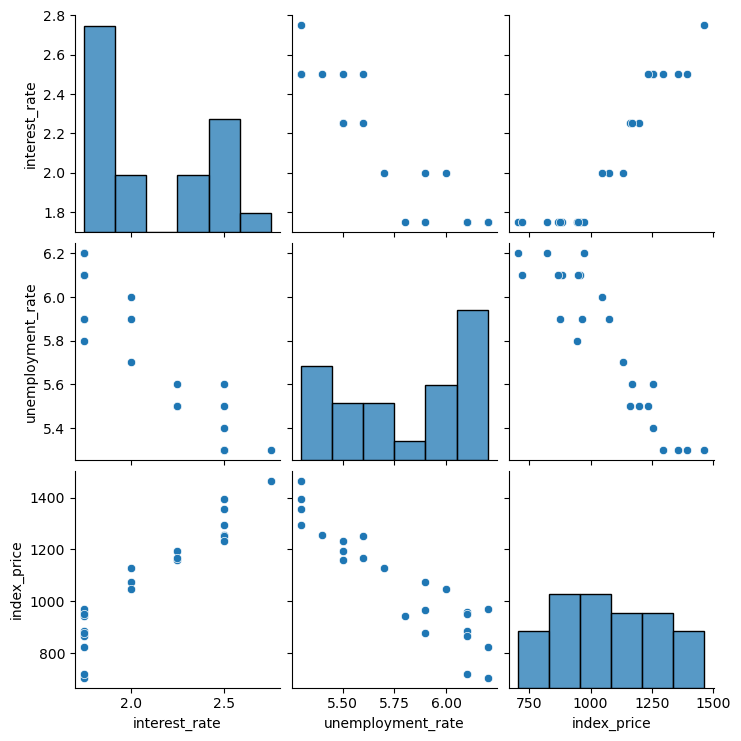

In [9]:
import seaborn as sns
# parameter for pair plot is the dataframe
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

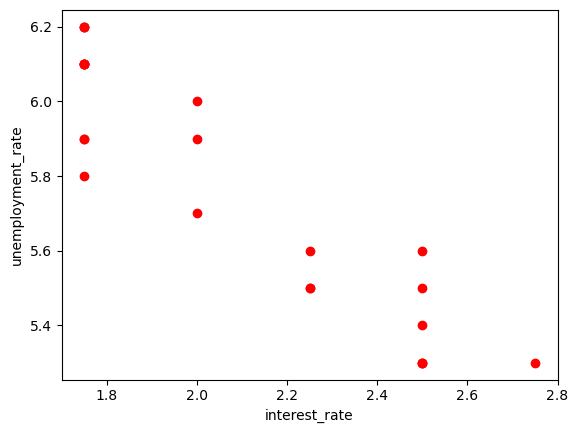

In [11]:
# visualize teh datapoints closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [12]:
# Independent and dependant variable
# X=df[['interest_rate,unemployement_date']]
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

# TRAIN TEST SPLIT

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

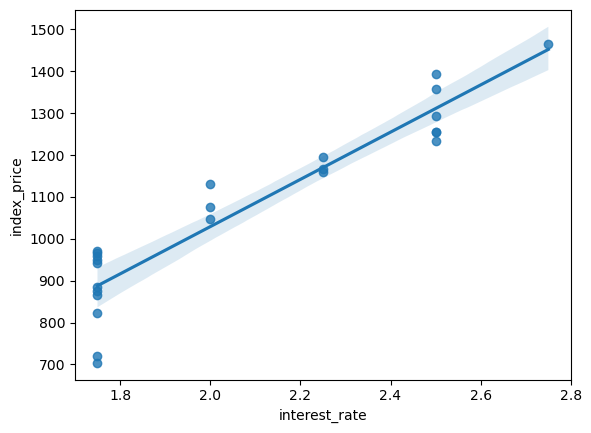

In [38]:
import seaborn as sns
sns.regplot(x=df['interest_rate'],y=df['index_price'])
# Regplots just shows the possible values of slope and intercept.From pairplot we already know whetehr the relation is positive or negative

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

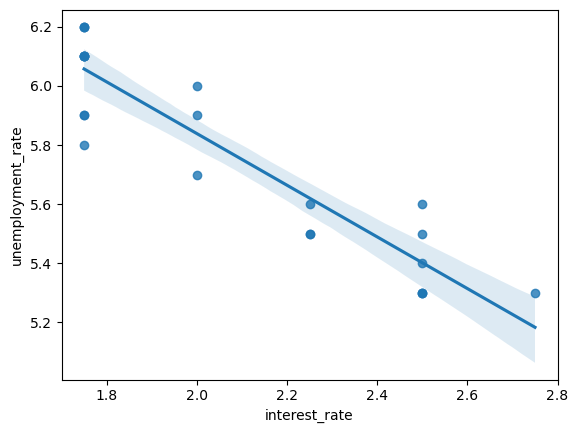

In [16]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler1=StandardScaler()

In [20]:
x_train=scaler1.fit_transform(x_train)
x_test=scaler1.transform(x_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


# cross validation - If the total data points were 1000, already train set has 900 and test set has 100. Now we can perform cross validation in 900.and make a validation test and a train set. If the Cv value is 3. then 900/3 = 300. At first the first 300 values are for validation rest 600 for training, 2nd 300 for validation and rest 600 for training and then 3rd 300 for validation and the rest for training.and we get the MSE(OR whatever we evaluation score we select) for each round. the validation_score if it is close to 0, then the error is minimum

In [53]:
from sklearn.model_selection import cross_val_score

In [61]:
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [62]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [63]:
validation_score.mean()

-5914.828180162388

# PREDICTION

In [28]:
y_pred=regression.predict(x_test)

In [29]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
mse=mean_squared_error(y_test,y_pred)

In [32]:
mean_absolute_error(y_test,y_pred)

59.93578152323554

In [33]:
np.sqrt(mse)

76.11677139574813

In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [35]:
score

0.8278978091457142

# ASSUMPTIONS

1.If there is a linear relationship between y_test and y_pred that means model has performed well

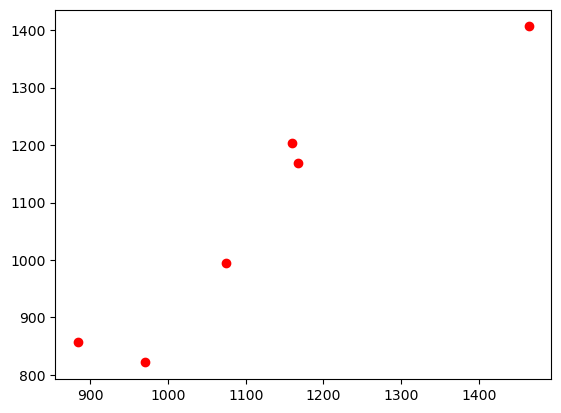

In [36]:
plt.scatter(y_test,y_pred,color='r')

2. Residuals

In [37]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


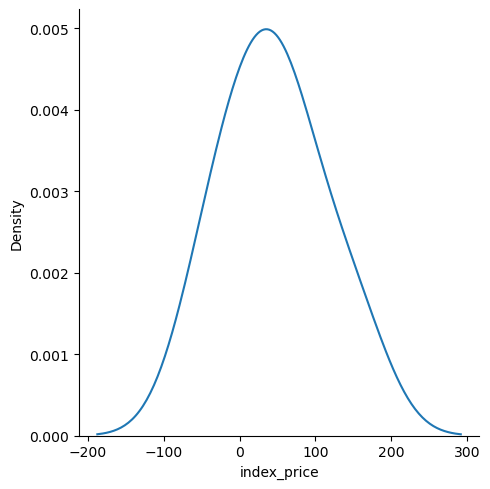

In [38]:
sns.displot(residuals, kind='kde')

This curve is a normal districution. If this curve comes that means the prediction is correct

3. Scatter plot with residuals and y_pred

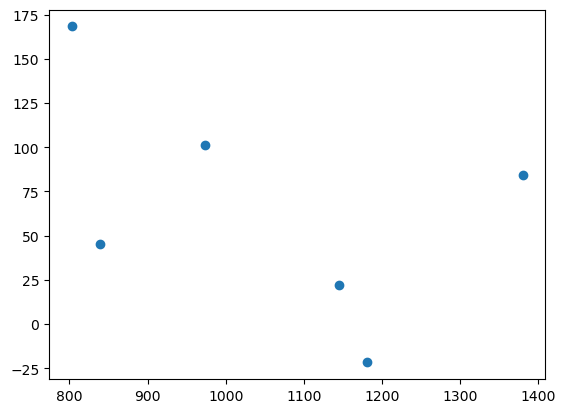

In [94]:
plt.scatter(y_pred,residuals)

Here if teh residual and y_predict plot is uniformly districbuted it means prediction is correct